# Additional Plots

In [1]:
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('master_dataframe.csv', index_col='DateTime', parse_dates=True)
df.head()

,R-01,R-02,R-04,R-05,R-06,R-07,R-08,R-09,R-10,R-11,...,U-28,U-29,U-31,U-32,U-33,U-34,U-36,U-37,U-38,Env_Temperature
DateTime,,,,,,,,,,,,,,,,,,,,,
2024-06-04 20:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.713333
2024-06-04 20:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.720000
2024-06-04 20:19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.726667
2024-06-04 20:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.733333
2024-06-04 20:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.740000


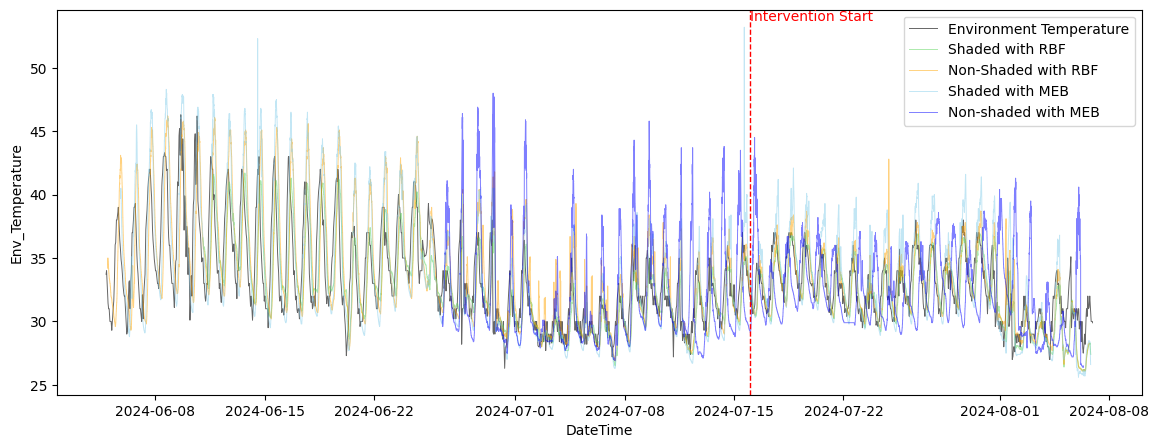

In [5]:
date_string = '2024-07-16,00:00:00'
date_object = datetime.strptime(date_string, '%Y-%m-%d,%H:%M:%S')

# sns.set_style("dark")

fig, ax = plt.subplots(figsize=(14, 5))
sns.lineplot(data=df, x='DateTime', y='Env_Temperature', c='black', alpha=0.6, linewidth=0.7, label='Environment Temperature')
sns.lineplot(data=df, x='DateTime', y='U-13', c='#5ad45a', alpha=0.5, linewidth=0.7, label='Shaded with RBF')
sns.lineplot(data=df, x='DateTime', y='U-15', c='orange', alpha=0.5, linewidth=0.7, label='Non-Shaded with RBF')
sns.lineplot(data=df, x='DateTime', y='U-05', c='skyblue', alpha=0.5, linewidth=0.7, label='Shaded with MEB')
sns.lineplot(data=df, x='DateTime', y='U-12', c='blue', alpha=0.5, linewidth=0.7, label='Non-shaded with MEB')
plt.axvline(x=date_object, color='red', linestyle='--', linewidth=1)
plt.text(date_object, ax.get_ylim()[1], 'Intervention Start', color='red', verticalalignment='top')
# plt.gcf().autofmt_xdate()  # Rotate and align the tick labels

# Set the background color
# plt.gca().set_facecolor('#2E2E2E')
# plt.gcf().set_facecolor('#2E2E2E')

# Adjust tick colors
# plt.tick_params(colors='white')

plt.show()

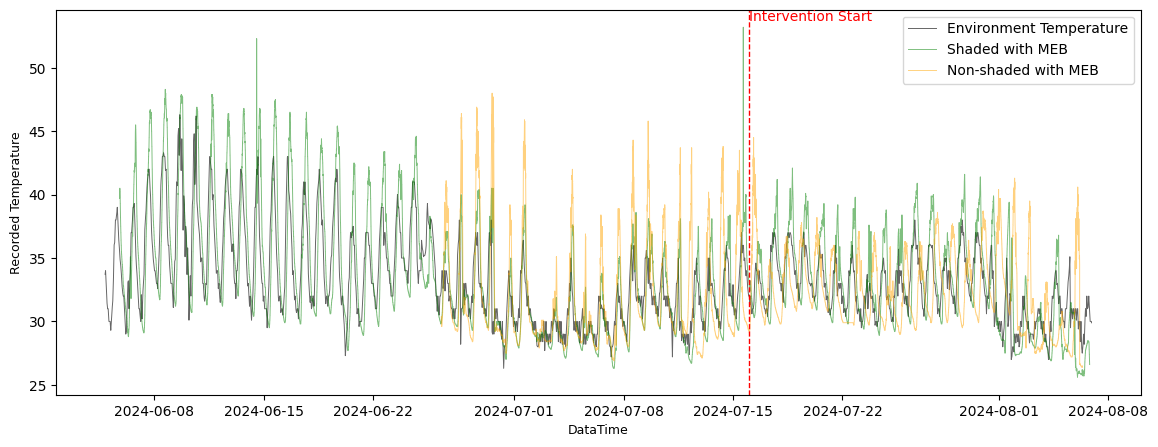

In [4]:
date_string = '2024-07-16,00:00:00'
date_object = datetime.strptime(date_string, '%Y-%m-%d,%H:%M:%S')

# sns.set_style("dark")

fig, ax = plt.subplots(figsize=(14, 5))
sns.lineplot(data=df, x='DateTime', y='Env_Temperature', c='black', alpha=0.6, linewidth=0.7, label='Environment Temperature')
# sns.lineplot(data=df, x='DateTime', y='U-03', c='green', alpha=0.5, linewidth=0.7, label='Shaded with RBF')
# sns.lineplot(data=df, x='DateTime', y='U-15', c='orange', alpha=0.5, linewidth=0.7, label='Non-Shaded with RBF')
sns.lineplot(data=df, x='DateTime', y='U-05', c='green', alpha=0.5, linewidth=0.7, label='Shaded with MEB')
sns.lineplot(data=df, x='DateTime', y='U-12', c='orange', alpha=0.5, linewidth=0.7, label='Non-shaded with MEB')
plt.axvline(x=date_object, color='red', linestyle='--', linewidth=1)
plt.text(date_object, ax.get_ylim()[1], 'Intervention Start', color='red', verticalalignment='top')
# plt.gcf().autofmt_xdate()  # Rotate and align the tick labels

# Set the background color
# plt.gca().set_facecolor('#2E2E2E')
# plt.gcf().set_facecolor('#2E2E2E')

# Adjust tick colors
# plt.tick_params(colors='white')

plt.xlabel('DataTime', fontsize=9)
plt.ylabel('Recorded Temperature', fontsize=9)
plt.show()

In [21]:
temperature_differences_df = pd.read_csv('temperature_differences.csv', parse_dates=['DateTime'])
logger_flags_df = pd.read_csv('logger_flags.csv')

In [22]:
logger_flags_df.shape

(45, 9)

In [23]:
u03 = logger_flags_df[logger_flags_df['Loggers'] == 'U-03'].index
logger_flags_df.drop(u03, inplace=True)
logger_flags_df.shape

(44, 9)

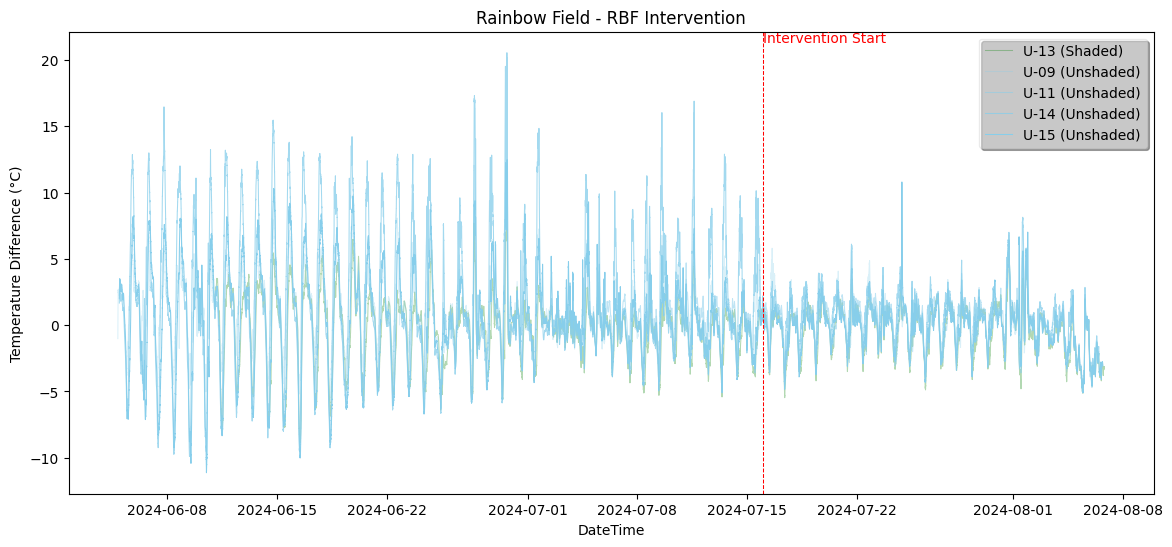

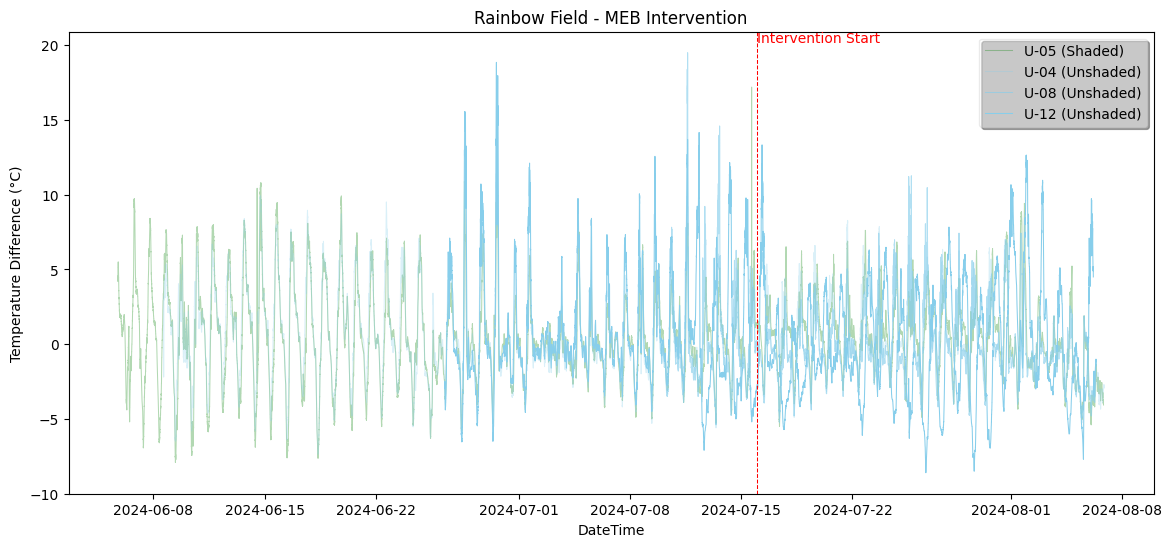

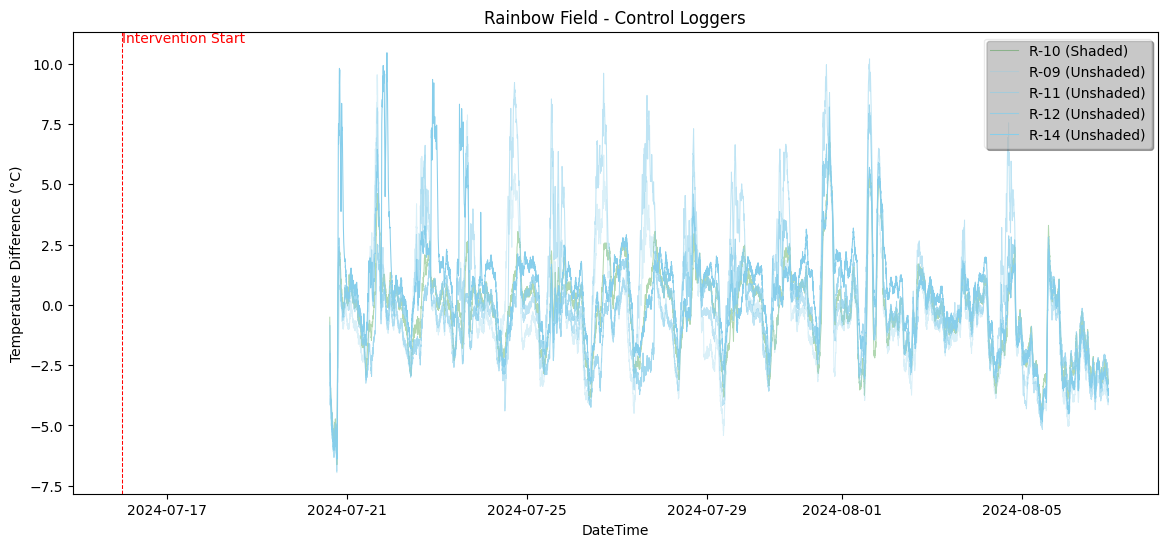

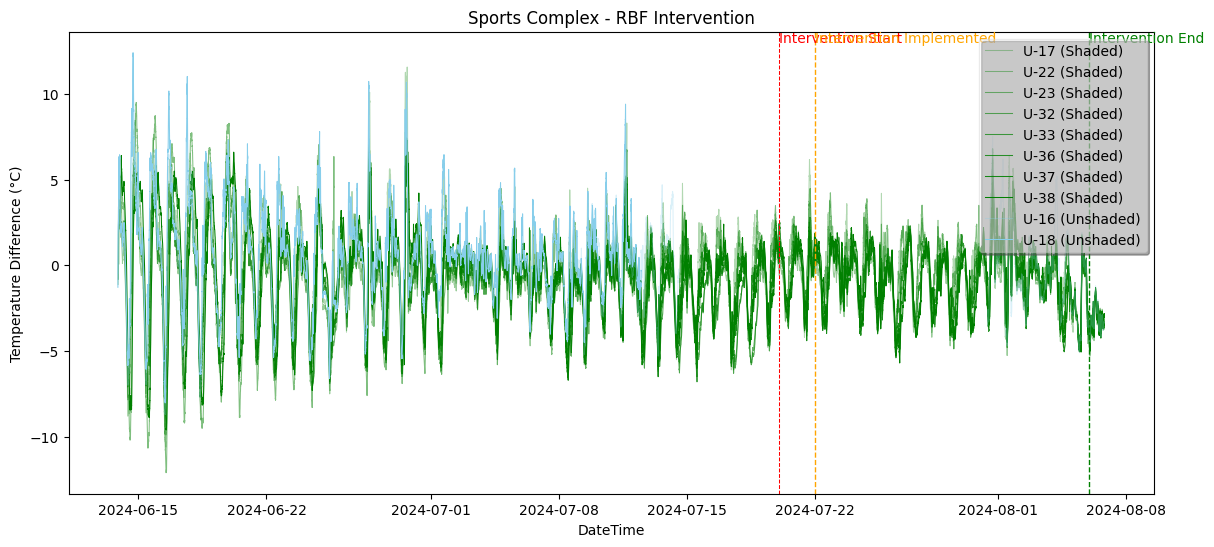

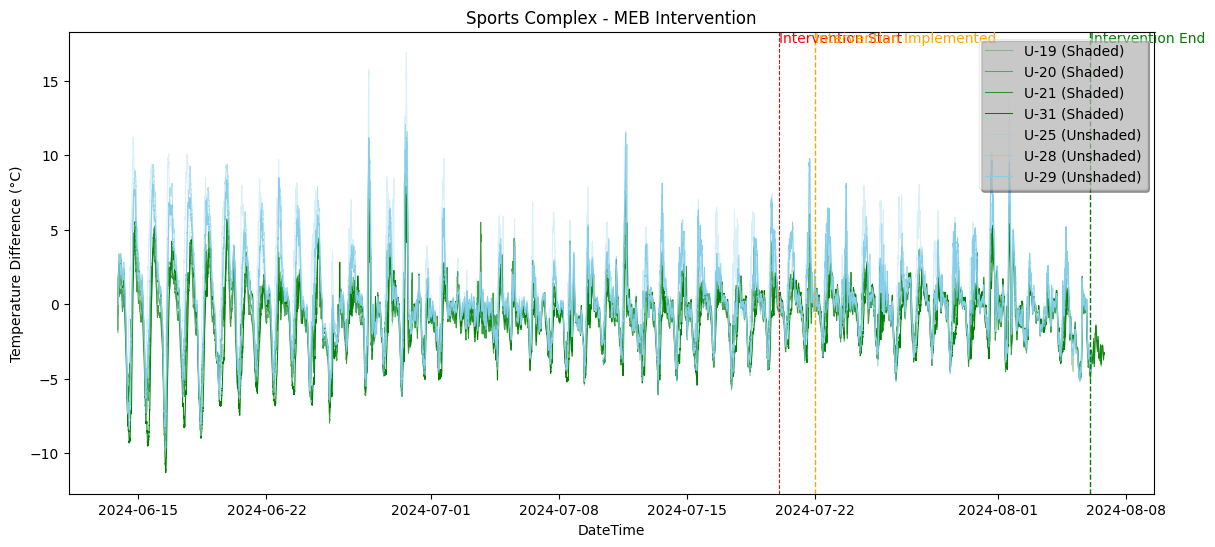

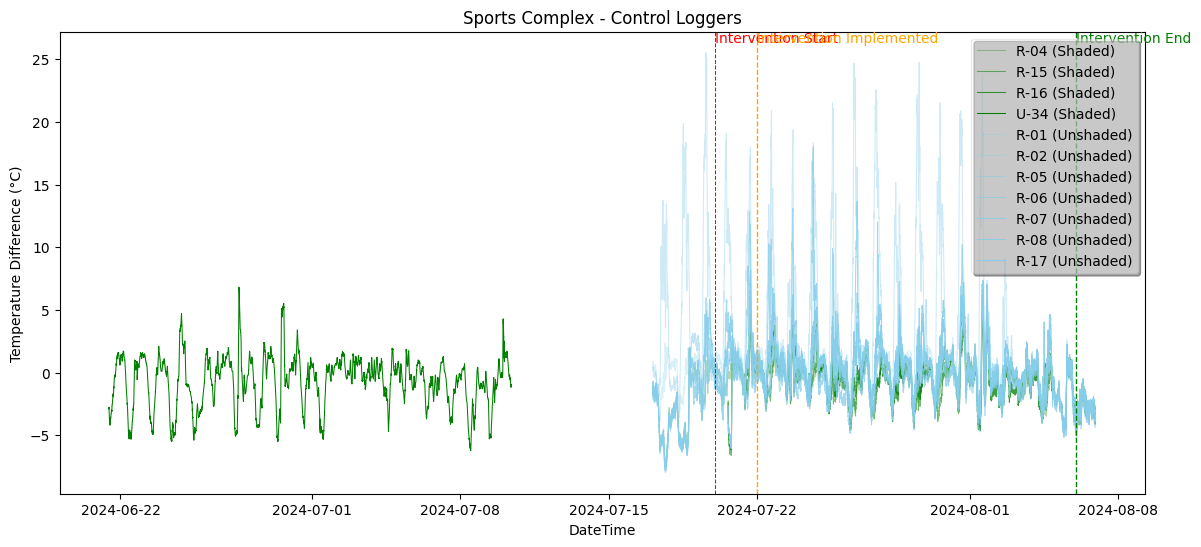

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

shaded_base_color = mcolors.CSS4_COLORS['green']
unshaded_base_color = mcolors.CSS4_COLORS['skyblue']

def get_shades(base_color, num_shades):
    return [mcolors.to_rgba(base_color, alpha) for alpha in np.linspace(0.3, 1, num_shades)]

def plot_temperature_differences(settlement, intervention_type, title, multi_label=False):
    loggers_subset = logger_flags_df[(logger_flags_df['Settlement'] == settlement) &
                                     (logger_flags_df['Intervention'] == intervention_type)]

    num_loggers = len(loggers_subset)
    shaded_loggers = loggers_subset[loggers_subset['Shaded']]
    unshaded_loggers = loggers_subset[~loggers_subset['Shaded']]

    shaded_colors = get_shades(shaded_base_color, len(shaded_loggers))
    unshaded_colors = get_shades(unshaded_base_color, len(unshaded_loggers))

    fig, ax = plt.subplots(figsize=(14, 6))
    lines = []

    for idx, (_, row) in enumerate(shaded_loggers.iterrows()):
        logger = row['Loggers']
        intervention_start = pd.to_datetime(row['Intervention_Start'])
        post_intervention_end = pd.to_datetime(row['Post_Intervention_End'])

        line, = ax.plot(temperature_differences_df['DateTime'], temperature_differences_df[logger],
                        label=f"{logger} (Shaded)", color=shaded_colors[idx], linewidth=0.75)
        lines.append(line)

    for idx, (_, row) in enumerate(unshaded_loggers.iterrows()):
        logger = row['Loggers']
        intervention_start = pd.to_datetime(row['Intervention_Start'])
        post_intervention_end = pd.to_datetime(row['Post_Intervention_End'])

        line, = ax.plot(temperature_differences_df['DateTime'], temperature_differences_df[logger],
                        label=f"{logger} (Unshaded)", color=unshaded_colors[idx], linewidth=0.75)
        lines.append(line)

    ax.axvline(x=intervention_start, color='red', linestyle='--', linewidth=0.75)
    ax.text(intervention_start, ax.get_ylim()[1], 'Intervention Start', color='red', verticalalignment='top')

    if multi_label:
        intervention_mid = intervention_start + pd.Timedelta(days=2)
        ax.axvline(x=intervention_mid, color='orange', linestyle='--', linewidth=1)
        ax.text(intervention_mid, ax.get_ylim()[1], 'Intervention Implemented', color='orange', verticalalignment='top')

        ax.axvline(x=post_intervention_end, color='green', linestyle='--', linewidth=1)
        ax.text(post_intervention_end, ax.get_ylim()[1], 'Intervention End', color='green', verticalalignment='top')

    ax.set_title(title)
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Temperature Difference (°C)')
    leg = ax.legend(loc='upper right', fancybox=True, shadow=True)
    leg.get_frame().set_alpha(0.4)

    lined = dict()
    for legline, origline in zip(leg.get_lines(), lines):
        legline.set_picker(5)  # 5 pts tolerance
        lined[legline] = origline

    def onpick(event):
        legline = event.artist
        origline = lined[legline]
        vis = not origline.get_visible()
        origline.set_visible(vis)
        legline.set_alpha(1.0 if vis else 0.2)
        fig.canvas.draw()

    fig.canvas.mpl_connect('pick_event', onpick)

    plt.grid(False)
    plt.show()

plot_temperature_differences('Rainbow Field', 'RBF', 'Rainbow Field - RBF Intervention')
plot_temperature_differences('Rainbow Field', 'MEB', 'Rainbow Field - MEB Intervention')
plot_temperature_differences('Rainbow Field', 'CONTROL', 'Rainbow Field - Control Loggers')
plot_temperature_differences('Sports Complex', 'RBF', 'Sports Complex - RBF Intervention', multi_label=True)
plot_temperature_differences('Sports Complex', 'MEB', 'Sports Complex - MEB Intervention', multi_label=True)
plot_temperature_differences('Sports Complex', 'CONTROL', 'Sports Complex - Control Loggers', multi_label=True)